In [1]:
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv("Iris.csv")
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],['setosa', 'versicolor', 'virginica'],inplace = True)
# df.head()

In [3]:
df = pd.read_csv("bc_data.csv")
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
df["class"].replace([2,4],["Benign","Malignant"],inplace = True)

In [6]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign


In [7]:
df["class"].value_counts()

Benign       458
Malignant    241
Name: class, dtype: int64

### I want to Apply All kind of Classification Algorithms

## 1. Logistic Regression

In [8]:
from  sklearn.model_selection import train_test_split 

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "class",axis = 1),df["class"],train_size = 0.70)

In [10]:
x_train


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
166,1197993,5,6,7,8,8,10,3,10,3
476,1296025,4,1,2,1,2,1,1,1,1
37,1081791,6,2,1,1,1,1,7,1,1
566,1333104,3,1,2,1,2,1,3,1,1
390,1131411,1,1,1,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
633,1253955,8,7,4,4,5,3,5,10,1
331,764974,5,1,1,1,2,1,3,1,2
116,1173347,8,3,3,1,2,2,3,2,1
12,1041801,5,3,3,3,2,3,4,4,1


In [11]:
x_test

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
106,1170419,10,10,10,8,2,10,4,1,1
241,1276091,3,1,1,3,1,1,3,1,1
436,1295186,10,10,10,1,6,1,2,8,1
228,1228311,1,1,1,1,1,1,3,1,1
200,1214966,9,7,7,5,5,10,7,8,3
...,...,...,...,...,...,...,...,...,...,...
393,1158247,1,1,1,1,1,1,1,1,1
336,797327,6,5,5,8,4,10,3,4,1
281,486662,2,1,1,2,2,1,3,1,1
614,1031608,2,1,1,1,1,1,2,1,1


In [12]:
y_train

166    Malignant
476       Benign
37        Benign
566       Benign
390       Benign
         ...    
633    Malignant
331       Benign
116       Benign
12     Malignant
553       Benign
Name: class, Length: 489, dtype: object

In [13]:
y_test

106    Malignant
241       Benign
436    Malignant
228       Benign
200    Malignant
         ...    
393       Benign
336    Malignant
281       Benign
614       Benign
259       Benign
Name: class, Length: 210, dtype: object

#### Now we Apply Algorithm called Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression()

In [16]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = pd.DataFrame(logreg.predict(x_test))
y_pred 

,0
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign
...,...
205,Benign
206,Benign
207,Benign
208,Benign


In [18]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop = True,inplace = True)
y_test

,class
0,Malignant
1,Benign
2,Malignant
3,Benign
4,Malignant
...,...
205,Benign
206,Malignant
207,Benign
208,Benign


In [19]:
y_both = pd.concat([y_test,y_pred],axis=1)
y_both.columns = ["Actual","Predicted"]
y_both

,Actual,Predicted
0,Malignant,Benign
1,Benign,Benign
2,Malignant,Benign
3,Benign,Benign
4,Malignant,Benign
...,...,...
205,Benign,Benign
206,Malignant,Benign
207,Benign,Benign
208,Benign,Benign


#### Now we check the Accuracy and all metrics 

In [20]:
from sklearn import metrics 

In [21]:
metrics.confusion_matrix(y_test,y_pred)

array([[134,   0],
       [ 76,   0]], dtype=int64)

In [22]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       0.64      1.00      0.78       134
   Malignant       0.00      0.00      0.00        76

    accuracy                           0.64       210
   macro avg       0.32      0.50      0.39       210
weighted avg       0.41      0.64      0.50       210



C:\Users\aakas\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import roc_auc_score,roc_curve

In [55]:
y_test1 = y_test.replace(["Benign","Malignant"],[0,1])
y_pred1 = y_pred.replace(["Benign","Malignant"],[0,1])
y_pred1_prob = logreg.predict_proba(x_test)

In [56]:
logit_roc = roc_auc_score(y_test1,y_pred1)

In [58]:
fpr, tpr, thresholds = roc_curve(y_test1,y_pred1_prob[:,1])

In [97]:
predict_mine = np.where(y_pred1_prob[:,0] <0.7,1,0)
predict_mine

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
metrics.confusion_matrix(y_test1,predict_mine)

array([[  7, 127],
       [  3,  73]], dtype=int64)

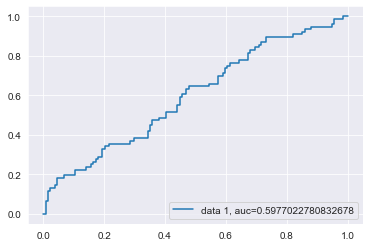

In [88]:
auc = metrics.roc_auc_score(y_test1, y_pred1_prob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [94]:
y_pred1_prob

array([[0.67635542, 0.32364458],
       [0.69074827, 0.30925173],
       [0.6933111 , 0.3066889 ],
       [0.68428408, 0.31571592],
       [0.68246567, 0.31753433],
       [0.69097704, 0.30902296],
       [0.68080469, 0.31919531],
       [0.99443227, 0.00556773],
       [0.67093871, 0.32906129],
       [0.58781952, 0.41218048],
       [0.61684485, 0.38315515],
       [0.67583288, 0.32416712],
       [0.70032978, 0.29967022],
       [0.68307129, 0.31692871],
       [0.67800537, 0.32199463],
       [0.68595403, 0.31404597],
       [0.70300898, 0.29699102],
       [0.67607138, 0.32392862],
       [0.66301003, 0.33698997],
       [0.67675892, 0.32324108],
       [0.66693317, 0.33306683],
       [0.69968508, 0.30031492],
       [0.68319725, 0.31680275],
       [0.69384311, 0.30615689],
       [0.68055009, 0.31944991],
       [0.68366908, 0.31633092],
       [0.67800537, 0.32199463],
       [0.52279503, 0.47720497],
       [0.68937552, 0.31062448],
       [0.68572946, 0.31427054],
       [0.

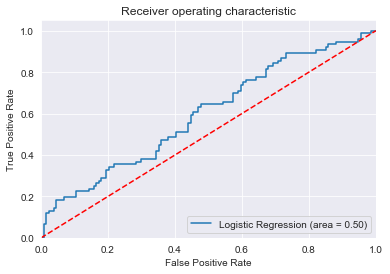

In [43]:
# import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [47]:
# from plot_metric.functions import BinaryClassification
# bc = BinaryClassification(y_test.replace(["Benign","Malignant"],[0,1]),y_pred.replace(["Benign","Malignant"],[0,1]),labels=[0,1])
# bc.plot_roc_curve()